## PyTorch

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
torch.__version__

'1.13.1+cu116'

In [4]:
a = torch.tensor([[1,2],[3,4]])
print(a)
a = torch.randn(size=(10,3))
print(a)

tensor([[1, 2],
        [3, 4]])
tensor([[ 1.6143, -0.0666,  0.0228],
        [ 1.4724,  0.1943, -0.7488],
        [-0.8499, -0.1110,  0.4710],
        [-1.1161, -0.2718,  1.0338],
        [ 0.1497,  0.5888,  1.5490],
        [-0.0630,  0.7988, -1.0361],
        [ 0.6260,  1.8508,  1.6514],
        [ 2.8101, -0.1983,  0.7017],
        [ 0.7853,  0.1794, -0.9134],
        [-0.3270, -1.5453,  1.6341]])


In [5]:
b = torch.randn(size=(10,3))

In [8]:
a.add(b) # returns new tensor
a.add_(b) # in-place operation

tensor([[ 2.1755,  0.4870, -0.6187],
        [ 1.8115, -0.5577, -0.0977],
        [ 0.7944, -0.8185,  0.2959],
        [ 0.1744, -0.4341,  2.4470],
        [ 0.0308,  1.2330,  1.5480],
        [ 2.0303,  0.4851,  0.0089],
        [ 1.6123,  0.7967,  2.6030],
        [ 2.9476, -0.0433,  0.2286],
        [ 0.1437, -1.1666, -2.3060],
        [-0.3296, -1.3057,  0.8462]])

In [12]:
s = torch.zeros_like(a[0])
for l in a:
  s.add_(l)

s

tensor([11.3910, -1.3240,  4.9552])

In [14]:
torch.sum(a,axis=0)

tensor([11.3910, -1.3240,  4.9552])

## Gradients

In [17]:
a = torch.randn(size=(2,2),requires_grad=True)
b = torch.randn(size=(2,2))
c = torch.mean(torch.sqrt(torch.square(a)+torch.square(b)))
c.backward()
print(a.grad)

tensor([[-0.2197, -0.2499],
        [-0.0077,  0.2115]])


In [18]:
c

tensor(1.1347, grad_fn=<MeanBackward0>)

## Linear Regression

In [2]:
X = np.linspace(0,3,120)
Y = X*1.8+0.7+np.random.randn(*X.shape)*0.5

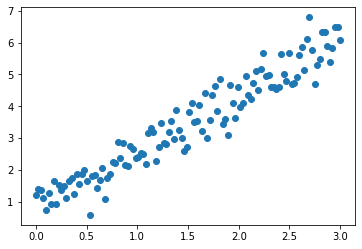

In [3]:
plt.scatter(X,Y)

In [76]:
w = torch.tensor([100.0],dtype=torch.float32,requires_grad=True)
b = torch.tensor(0.0,dtype=torch.float32,requires_grad=True)

def f(x):
  return torch.matmul(x,w)+b

def loss(labels,predictions):
  return torch.mean(torch.square(labels-predictions))

tY = torch.tensor(Y,dtype=torch.float32)
tX = torch.tensor(X.reshape(-1,1),dtype=torch.float32)

loss(tY,f(tX))

tensor(28856.9180, grad_fn=<MeanBackward0>)

In [82]:
lr = 0.1
for i in range(100):
  p = f(tX)
  l = loss(tY,p)
  print(f"loss={l}, w={w}, b={b}")
  l.backward()
  w.data.sub_(lr*w.grad)
  b.data.sub_(lr*b.grad)
  w.grad.zero_()
  b.grad.zero_()

loss=0.2751008868217468, w=tensor([1.8514], requires_grad=True), b=0.5590196847915649
loss=0.2751006484031677, w=tensor([1.8513], requires_grad=True), b=0.5591573715209961
loss=0.27510038018226624, w=tensor([1.8513], requires_grad=True), b=0.5592895150184631
loss=0.2751002013683319, w=tensor([1.8512], requires_grad=True), b=0.5594163537025452
loss=0.2751000225543976, w=tensor([1.8511], requires_grad=True), b=0.5595381855964661
loss=0.27509984374046326, w=tensor([1.8511], requires_grad=True), b=0.5596551299095154
loss=0.2750997245311737, w=tensor([1.8510], requires_grad=True), b=0.5597673654556274
loss=0.27509960532188416, w=tensor([1.8510], requires_grad=True), b=0.5598751306533813
loss=0.27509939670562744, w=tensor([1.8509], requires_grad=True), b=0.5599786043167114
loss=0.2750993072986603, w=tensor([1.8509], requires_grad=True), b=0.5600779056549072
loss=0.2750991880893707, w=tensor([1.8508], requires_grad=True), b=0.5601732134819031
loss=0.27509909868240356, w=tensor([1.8508], requi

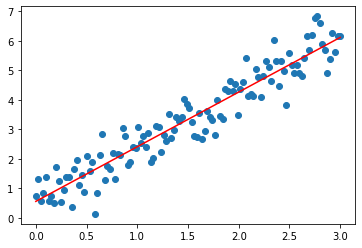

In [88]:
plt.scatter(X,Y)
#plt.plot(X,f(tX).detach().numpy(),color='r')
with torch.no_grad():
  plt.plot(X,f(tX),color='r')

## GPU

In [6]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [8]:
w = torch.tensor([100.0],dtype=torch.float32,requires_grad=True,device=device)
b = torch.tensor(0.0,dtype=torch.float32,requires_grad=True,device=device)

def f(x):
  return torch.matmul(x,w)+b

def loss(labels,predictions):
  return torch.mean(torch.square(labels-predictions))

tY = torch.tensor(Y,dtype=torch.float32).to(device)
tX = torch.tensor(X.reshape(-1,1),dtype=torch.float32).to(device)

lr = 0.1
for i in range(100):
  p = f(tX)
  l = loss(tY,p)
  print(f"loss={l}, w={w}, b={b}")
  l.backward()
  w.data.sub_(lr*w.grad)
  b.data.sub_(lr*b.grad)
  w.grad.zero_()
  b.grad.zero_()


loss=28835.826171875, w=tensor([100.], device='cuda:0', requires_grad=True), b=0.0
loss=2008.357177734375, w=tensor([41.0526], device='cuda:0', requires_grad=True), b=-29.30792808532715
loss=465.3868713378906, w=tensor([26.4147], device='cuda:0', requires_grad=True), b=-35.0700569152832
loss=350.7710266113281, w=tensor([22.3250], device='cuda:0', requires_grad=True), b=-35.288368225097656
loss=318.875732421875, w=tensor([20.7650], device='cuda:0', requires_grad=True), b=-34.23612594604492
loss=293.6398010253906, w=tensor([19.8292], device='cuda:0', requires_grad=True), b=-32.92631530761719
loss=270.61712646484375, w=tensor([19.0643], device='cuda:0', requires_grad=True), b=-31.597740173339844
loss=249.412841796875, w=tensor([18.3617], device='cuda:0', requires_grad=True), b=-30.30541229248047
loss=229.8719482421875, w=tensor([17.6947], device='cuda:0', requires_grad=True), b=-29.06077003479004
loss=211.86326599121094, w=tensor([17.0562], device='cuda:0', requires_grad=True), b=-27.8649

## Classification

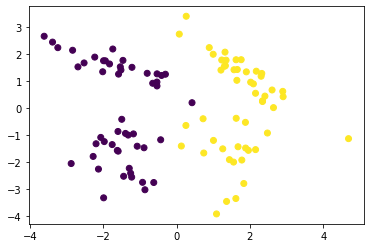

In [9]:
from sklearn.datasets import make_classification

X,Y = make_classification(100,2,n_informative=2, n_redundant=0, flip_y=0, class_sep=1.5)
plt.scatter(X[:,0],X[:,1],c=Y)

In [10]:
X.shape, Y.shape

((100, 2), (100,))

In [11]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X,Y,test_size=0.2,shuffle=True)
train_x.shape, train_y.shape

((80, 2), (80,))

In [49]:
net = torch.nn.Linear(2,1)
net(torch.randn(size=(10,2)))

tensor([[-0.4970],
        [-0.2152],
        [-0.6317],
        [-0.3079],
        [ 1.5695],
        [ 0.5681],
        [-0.0640],
        [-0.0516],
        [ 0.1804],
        [-0.8254]], grad_fn=<AddmmBackward0>)

In [50]:
list(net.parameters())

[Parameter containing:
 tensor([[0.0050, 0.5494]], requires_grad=True), Parameter containing:
 tensor([0.1632], requires_grad=True)]

In [51]:
dataset = torch.utils.data.TensorDataset(torch.tensor(train_x,dtype=torch.float32),torch.tensor(train_y,dtype=torch.float32))
dataloader = torch.utils.data.DataLoader(dataset,batch_size=16)

In [52]:
optim = torch.optim.SGD(net.parameters(),lr=0.05)

In [ ]:
ttest_x = torch.tensor(test_x,dtype=torch.float32)
ttest_y = torch.tensor(test_y,dtype=torch.float32)

In [53]:
for ep in range(10):
  for (x,y) in dataloader:
      z = net.forward(x).flatten()
      # p = sigmoid(z), loss = cross_ent_loss(p,y)
      loss = torch.nn.functional.binary_cross_entropy_with_logits(z,y)
      optim.zero_grad()
      loss.backward()
      optim.step()
  acc = torch.mean(((net(ttest_x)>0).float().flatten()==ttest_y).float())
  print(f"epoch = {ep}, loss={loss}, acc={acc}")


epoch = 0, loss=0.5674002766609192, acc=0.6000000238418579
epoch = 1, loss=0.43985140323638916, acc=0.75
epoch = 2, loss=0.353393018245697, acc=0.8999999761581421
epoch = 3, loss=0.29380151629447937, acc=0.8999999761581421
epoch = 4, loss=0.25124186277389526, acc=0.8999999761581421
epoch = 5, loss=0.21964521706104279, acc=0.8999999761581421
epoch = 6, loss=0.19535095989704132, acc=0.949999988079071
epoch = 7, loss=0.17610841989517212, acc=1.0
epoch = 8, loss=0.16048671305179596, acc=1.0
epoch = 9, loss=0.1475427895784378, acc=1.0


In [36]:
torch.mean(((net(ttest_x)>0).float().flatten()==ttest_y).float())

tensor(0.8500)

In [54]:
def train(net, dataloader, test=None, epochs=10,lr=0.05):
  optim = torch.optim.SGD(net.parameters(),lr=lr)
  for ep in range(epochs):
    for (x,y) in dataloader:
        z = net.forward(x).flatten()
        # p = sigmoid(z), loss = cross_ent_loss(p,y)
        loss = torch.nn.functional.binary_cross_entropy_with_logits(z,y)
        optim.zero_grad()
        loss.backward()
        optim.step()
    if test:
      (ttest_x,ttest_y) = test
      acc = torch.mean(((net(ttest_x)>0).float().flatten()==ttest_y).float())
    else:
      acc = "no test"
    print(f"epoch = {ep}, loss={loss}, acc={acc}")


In [61]:
net = torch.nn.Linear(2,1)
train(net,dataloader,test=(ttest_x,ttest_y),lr=0.05)

epoch = 0, loss=0.3630484342575073, acc=0.8999999761581421
epoch = 1, loss=0.3061462640762329, acc=0.8999999761581421
epoch = 2, loss=0.2642037570476532, acc=0.8999999761581421
epoch = 3, loss=0.2322477102279663, acc=0.8999999761581421
epoch = 4, loss=0.20719322562217712, acc=0.8999999761581421
epoch = 5, loss=0.18706703186035156, acc=0.8999999761581421
epoch = 6, loss=0.17056462168693542, acc=0.949999988079071
epoch = 7, loss=0.1567961424589157, acc=0.949999988079071
epoch = 8, loss=0.14513690769672394, acc=0.949999988079071
epoch = 9, loss=0.13513699173927307, acc=0.949999988079071


## Sequential network definition

In [63]:
net = torch.nn.Sequential(torch.nn.Linear(2,5),torch.nn.Sigmoid(),torch.nn.Linear(5,1))
train(net,dataloader,test=(ttest_x,ttest_y),lr=0.1)


epoch = 0, loss=0.6393035054206848, acc=0.6000000238418579
epoch = 1, loss=0.6121999025344849, acc=0.6000000238418579
epoch = 2, loss=0.5904515981674194, acc=0.800000011920929
epoch = 3, loss=0.5707559585571289, acc=0.949999988079071
epoch = 4, loss=0.5514424443244934, acc=0.949999988079071
epoch = 5, loss=0.5317647457122803, acc=0.949999988079071
epoch = 6, loss=0.5114790201187134, acc=1.0
epoch = 7, loss=0.4906068444252014, acc=1.0
epoch = 8, loss=0.4693039357662201, acc=1.0
epoch = 9, loss=0.44778600335121155, acc=1.0


## Python Class network definition

In [65]:
class MyNet(torch.nn.Module):
  def __init__(self,hidden_size=10,func=torch.nn.Sigmoid()):
    super().__init__()
    self.fc1 = torch.nn.Linear(2,hidden_size)
    self.func = func
    self.fc2 = torch.nn.Linear(hidden_size,1)

  def forward(self,x):
    x = self.fc1(x)
    x = self.func(x)
    x = self.fc2(x)
    return x
  
net = MyNet()

train(net,dataloader,test=(ttest_x,ttest_y),lr=0.1,epochs=20)


epoch = 0, loss=0.6712511777877808, acc=0.699999988079071
epoch = 1, loss=0.6384917497634888, acc=0.8500000238418579
epoch = 2, loss=0.6073416471481323, acc=0.8500000238418579
epoch = 3, loss=0.5773463249206543, acc=0.949999988079071
epoch = 4, loss=0.5482304692268372, acc=0.949999988079071
epoch = 5, loss=0.5198550820350647, acc=0.949999988079071
epoch = 6, loss=0.49218183755874634, acc=0.949999988079071
epoch = 7, loss=0.4652423858642578, acc=1.0
epoch = 8, loss=0.43911150097846985, acc=1.0
epoch = 9, loss=0.41388511657714844, acc=1.0
epoch = 10, loss=0.3896615505218506, acc=1.0
epoch = 11, loss=0.3665289878845215, acc=1.0
epoch = 12, loss=0.34455665946006775, acc=1.0
epoch = 13, loss=0.3237905502319336, acc=1.0
epoch = 14, loss=0.3042524456977844, acc=1.0
epoch = 15, loss=0.28594136238098145, acc=1.0
epoch = 16, loss=0.26883670687675476, acc=1.0
epoch = 17, loss=0.2529018521308899, acc=1.0
epoch = 18, loss=0.2380879819393158, acc=1.0
epoch = 19, loss=0.22433817386627197, acc=1.0
